<a href="https://colab.research.google.com/github/JaySakarvadia/portfolio-backtesting/blob/main/backtesting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance pandas

[*********************100%%**********************]  19 of 19 completed


Adjusted start date to 2012-05-18


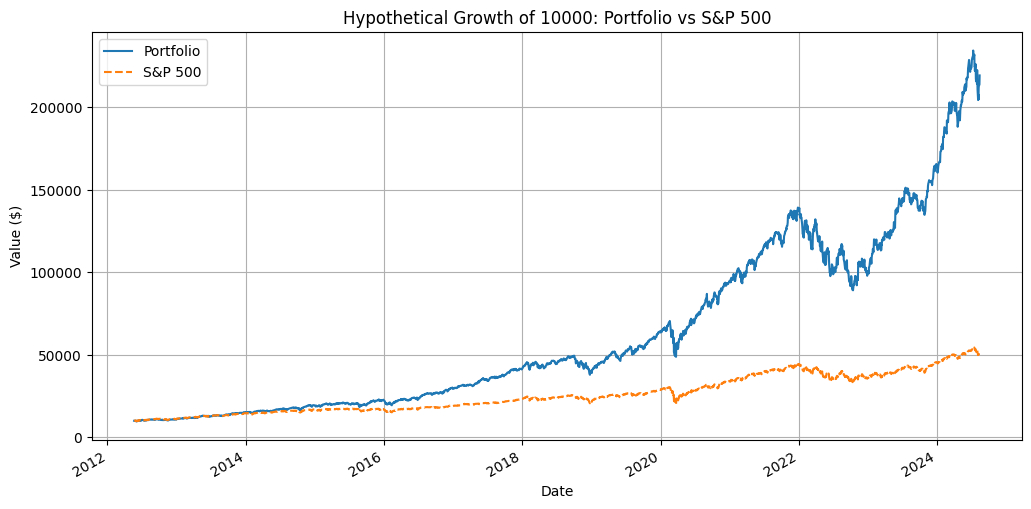

Performance Metrics:
                                 Metric  Portfolio  S&P 500
0                      Total Return (%)     2093.2    423.0
1  Annualized Return (Full History) (%)       28.7     14.5
2             Annualized Volatility (%)       21.2     16.7
3                          Sharpe Ratio      135.2     86.8
4                        YTD Return (%)       32.8     14.8

Periodic Annualized Returns:
                             Metric  Portfolio  S&P 500
0    Annualized Return (1 Year) (%)       51.3     22.7
1   Annualized Return (3 Years) (%)       22.4      8.5
2   Annualized Return (5 Years) (%)       33.8     15.3
3  Annualized Return (10 Years) (%)       29.1     12.9

Annual Returns:
    Year  Portfolio Annual Return (%)  S&P 500 Annual Return (%)
0   2013                         41.2                       32.3
1   2014                         25.1                       13.5
2   2015                         16.1                        1.2
3   2016                        

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the portfolio
portfolio = {
    'SMH': 0.20,
    'NVDA': 0.10,
    'MSFT': 0.10,
    'AAPL': 0.04,
    'COST': 0.04,
    'AXP': 0.04,
    'BX': 0.04,
    'BLK': 0.04,
    'V': 0.04,
    'JPM': 0.04,
    'AMZN': 0.04,
    'META': 0.04,
    'AVGO': 0.04,
    'TSM': 0.04,
    'PG': 0.04,
    'KO': 0.04,
    'PEP': 0.04,
    'TGT': 0.04
}

# Define the initial time period for backtesting
initial_start_date = '2000-01-01'
end_date = pd.Timestamp.today().strftime('%Y-%m-%d')

# Fetch historical data for the portfolio and S&P 500 using adjusted close prices
tickers = list(portfolio.keys()) + ['SPY']
data = yf.download(tickers, start=initial_start_date, end=end_date)['Adj Close']

# Drop any rows with missing data
data = data.dropna()

# Adjust the start date to the first date where all securities have data
start_date = data.index[0].strftime('%Y-%m-%d')

# Print adjusted start date
print(f"Adjusted start date to {start_date}")

# Separate portfolio and S&P 500 data
portfolio_data = data[list(portfolio.keys())]
sp500_data = data['SPY']

# Calculate daily returns
portfolio_daily_returns = portfolio_data.pct_change().dropna()
sp500_daily_returns = sp500_data.pct_change().dropna()

# Calculate portfolio daily returns
weights = np.array(list(portfolio.values()))
portfolio_returns = portfolio_daily_returns.dot(weights)

# Calculate cumulative returns
portfolio_cumulative_returns = (1 + portfolio_returns).cumprod()
sp500_cumulative_returns = (1 + sp500_daily_returns).cumprod()

# Hypothetical growth of $10,000
initial_investment = 10000
portfolio_growth = initial_investment * portfolio_cumulative_returns
sp500_growth = initial_investment * sp500_cumulative_returns

# Plot the cumulative returns
plt.figure(figsize=(12, 6))
portfolio_growth.plot(label='Portfolio')
sp500_growth.plot(label='S&P 500', linestyle='--')
plt.title(f'Hypothetical Growth of {initial_investment}: Portfolio vs S&P 500')
plt.xlabel('Date')
plt.ylabel('Value ($)')
plt.legend()
plt.grid(True)
plt.show()

# Calculate annual returns
portfolio_annual_returns = portfolio_cumulative_returns.resample('Y').ffill().pct_change().dropna()
sp500_annual_returns = sp500_cumulative_returns.resample('Y').ffill().pct_change().dropna()

# Function to calculate annualized return
def annualized_return(cumulative_returns, years):
    return (cumulative_returns.iloc[-1])**(1/years) - 1

# Calculate performance metrics for the portfolio
portfolio_total_return = portfolio_cumulative_returns.iloc[-1] - 1
years = (portfolio_cumulative_returns.index[-1] - portfolio_cumulative_returns.index[0]).days / 365.25
portfolio_annualized_return = annualized_return(portfolio_cumulative_returns, years)
portfolio_annualized_volatility = portfolio_returns.std() * np.sqrt(252)
portfolio_sharpe_ratio = portfolio_annualized_return / portfolio_annualized_volatility

# Calculate performance metrics for S&P 500
sp500_total_return = sp500_cumulative_returns.iloc[-1] - 1
sp500_annualized_return = annualized_return(sp500_cumulative_returns, years)
sp500_annualized_volatility = sp500_daily_returns.std() * np.sqrt(252)
sp500_sharpe_ratio = sp500_annualized_return / sp500_annualized_volatility

# Convert metrics to percentages and round to the nearest tenth
portfolio_metrics = [round(metric * 100, 1) for metric in [portfolio_total_return, portfolio_annualized_return, portfolio_annualized_volatility, portfolio_sharpe_ratio]]
sp500_metrics = [round(metric * 100, 1) for metric in [sp500_total_return, sp500_annualized_return, sp500_annualized_volatility, sp500_sharpe_ratio]]

# Calculate YTD returns
def ytd_return(cumulative_returns):
    current_year = pd.Timestamp.today().year
    start_of_year = pd.Timestamp(f'{current_year}-01-01')
    if start_of_year in cumulative_returns.index:
        start_value = cumulative_returns.loc[start_of_year]
    else:
        start_value = cumulative_returns.asof(start_of_year)
    return (cumulative_returns.iloc[-1] / start_value) - 1

portfolio_ytd_return = ytd_return(portfolio_cumulative_returns)
sp500_ytd_return = ytd_return(sp500_cumulative_returns)

# Calculate annualized returns for 1, 3, 5, 10 years (excluding YTD)
def calculate_periodic_annualized_return(cumulative_returns, days):
    if len(cumulative_returns) >= days:
        return (cumulative_returns.iloc[-1] / cumulative_returns.iloc[-days])**(1/(days/252)) - 1
    else:
        return np.nan

periods = {
    '1 Year': 252,
    '3 Years': 252 * 3,
    '5 Years': 252 * 5,
    '10 Years': 252 * 10
}

periodic_returns = {'Metric': [], 'Portfolio': [], 'S&P 500': []}
for period, days in periods.items():
    portfolio_return = calculate_periodic_annualized_return(portfolio_cumulative_returns, days)
    sp500_return = calculate_periodic_annualized_return(sp500_cumulative_returns, days)
    periodic_returns['Metric'].append(f'Annualized Return ({period}) (%)')
    periodic_returns['Portfolio'].append(round(portfolio_return * 100, 1) if not np.isnan(portfolio_return) else np.nan)
    periodic_returns['S&P 500'].append(round(sp500_return * 100, 1) if not np.isnan(sp500_return) else np.nan)

# Create DataFrames to store the metrics
metrics_df = pd.DataFrame({
    'Metric': ['Total Return (%)', 'Annualized Return (Full History) (%)', 'Annualized Volatility (%)', 'Sharpe Ratio', 'YTD Return (%)'],
    'Portfolio': portfolio_metrics + [round(portfolio_ytd_return * 100, 1) if not np.isnan(portfolio_ytd_return) else np.nan],
    'S&P 500': sp500_metrics + [round(sp500_ytd_return * 100, 1) if not np.isnan(sp500_ytd_return) else np.nan]
})

periodic_returns_df = pd.DataFrame(periodic_returns)

# Create a DataFrame to store the annual returns and round to the nearest tenth
annual_returns_df = pd.DataFrame({
    'Year': portfolio_annual_returns.index.year,
    'Portfolio Annual Return (%)': np.round(portfolio_annual_returns.values * 100, 1),
    'S&P 500 Annual Return (%)': np.round(sp500_annual_returns.values * 100, 1)
})

# Display the DataFrames
print("Performance Metrics:")
print(metrics_df)
print("\nPeriodic Annualized Returns:")
print(periodic_returns_df)
print("\nAnnual Returns:")
print(annual_returns_df)


In [ ]:
# display(metrics_df)
# print("\n") # Add an empty line
# display(periodic_returns_df)
# print("\n") # Add an empty line
# display(annual_returns_df)